### Projeto Final de Machine Learning

##### Exercício 1 - Classificação

Neste exercício, vamos trabalhar com o conjunto de dados Wine (carregado abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Normalizar o conjunto de dados. 
<br>2- Separar as observações e rótulos em dois conjuntos (treino e teste) de acordo com o método hold-out (75/25)
<br>3- Executar o PCA sobre todo o conjunto de dados e plotar um gráfico com duas dimensões que mostre os dois componentes principais e os pontos com cores diferentes de acordo com o rótulo. 
<br>4- Construir modelos de aprendizado (classificação) de acordo com os seguintes algoritmos: Árvore de Decisão, Random Forest e kNN. 
<br>5- Testar o desempenho dos três modelos, imprimindo na tela as principais métricas de desempenho e a matriz de confusão. 

<br> Após executar os códigos, responda: qual modelo teve o melhor desempenho?

In [52]:
import pandas as pd
import numpy as np
from sklearn import datasets 


wine_data, wine_target = datasets.load_wine(return_X_y=True, as_frame=True)

wine_target = pd.DataFrame({'classes':wine_target.values})

wine_data.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Normalizando os dados para que todos os valores numéricos estejam na mesma escala, utilizando o Standard Scaler do scikit learn 
#### PCA é sensível ao escalonamento das características                                             


In [53]:
from sklearn.preprocessing import StandardScaler

wine_normalized = StandardScaler().fit_transform(wine_data)

### Aplicando a PCA para reduzir a dimensionalidade dos dados

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)

principalComponents = pca.fit_transform(wine_normalized)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13'])


finalDf = pd.concat([principalDf, wine_target[['classes']]], axis = 1)
finalDf.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,classes
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,0


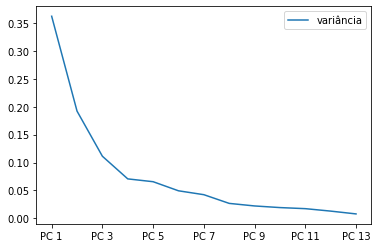

In [56]:
import matplotlib.pyplot as plt

PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13 = pca.explained_variance_ratio_

pd.DataFrame({
   'variância': [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13]
   }, index=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13']).plot.line()

plt.show()

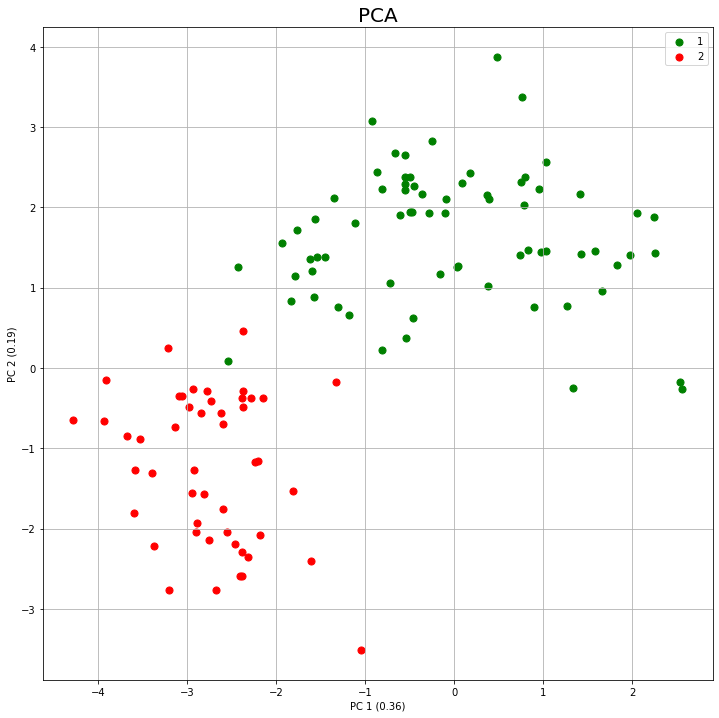

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ('+str(round(PC1,2))+ ')')
ax.set_ylabel('PC 2 ('+str(round(PC2,2))+ ')')
ax.set_title('PCA', fontsize = 20)
targets = [1, 2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['classes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
                
ax.legend(targets)
ax.grid()

### Aplicando o método hold-out para separar um conjunto de teste e outro de treinamento. 25% / 75%

In [58]:
from sklearn.model_selection import train_test_split

wine_train, wine_test = train_test_split(finalDf, test_size=0.25)

In [59]:
### Matriz de confusão bonitona

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

### Treinando um modelo de árvore de decisão

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()

X = wine_train.drop("classes", axis=1)
y = np.array(wine_train['classes'])

clf.fit(X,y)

X = wine_test.drop("classes", axis=1)
y_atual= np.array(wine_test['classes'])

y_pred=clf.predict(X)

print("Acurácia: ")
print(accuracy_score(y_atual, y_pred))
print(classification_report(y_atual, y_pred))
conf_matrix = confusion_matrix(y_atual, y_pred)

conf_matrix

Acurácia: 
0.9777777777777777
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        11

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



array([[17,  0,  0],
       [ 1, 16,  0],
       [ 0,  0, 11]])

### Plot da matriz de confusão. Aqui é esperado que a maioria dos dados se encontrem na diagonal principal, uma vez que representa as classificações corretas, ou verdadeiro positivos

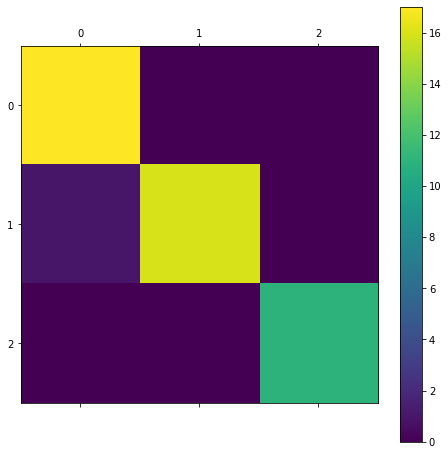

In [61]:
plot_confusion_matrix(conf_matrix)

### Treinando o modelo Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

X = wine_train.drop("classes", axis=1)
y = np.array(wine_train['classes'])

clf.fit(X,y)

X = wine_test.drop("classes", axis=1)
y_atual= np.array(wine_test['classes'])

y_pred=clf.predict(X)

confusion_matrix(y_atual, y_pred)

print("Resultado Random Forest:")
print(accuracy_score(y_atual, y_pred))
print(classification_report(y_atual, y_pred))
conf_matrix = confusion_matrix(y_atual, y_pred)

conf_matrix

Resultado Random Forest:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



array([[17,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]])

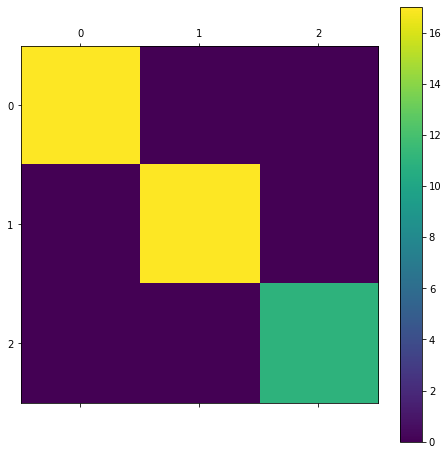

In [63]:
plot_confusion_matrix(conf_matrix)

### Modelo KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

X = wine_train.drop("classes", axis=1)
y = np.array(wine_train['classes'])

clf.fit(X,y)

X = wine_test.drop("classes", axis=1)
y_atual= np.array(wine_test['classes'])

y_pred=clf.predict(X)

confusion_matrix(y_atual, y_pred)

print("Resultado KNN:")
print(accuracy_score(y_atual, y_pred))
print(classification_report(y_atual, y_pred))
conf_matrix = confusion_matrix(y_atual, y_pred)

conf_matrix

Resultado KNN:
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 11]])

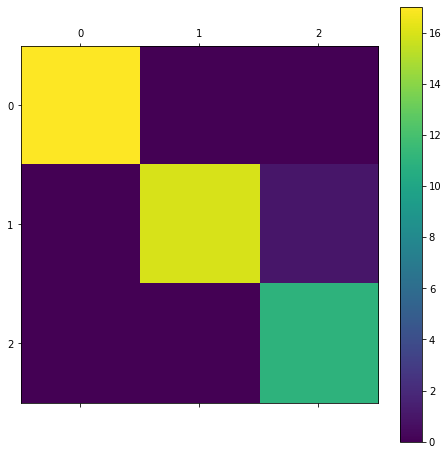

In [65]:
plot_confusion_matrix(conf_matrix)

***CONCLUSÃO***


Após treinar 3 modelos diferentes, Árvores de Decisão, Random Forest e KNN é possível verificar que o modelo obtido com o algoritmo RandomForest foi o que obteve o melhor desempenho, classificando corretamente 100% dos dados de teste.

##### Exercício 2 - Regressão

Neste exercício, vamos trabalhar com o conjunto de dados Diabetes (carregado abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Separar as observações e rótulos em dois conjuntos (treino e teste) de acordo com o método hold-out (75/25)
<br>2- Construir modelos de aprendizado (regressão) de acordo com os seguintes algoritmos: Random Forest, SVM (kernels linear, RBF e polinomial). 
<br>3- Testar o desempenho dos quatro modelos, imprimindo na tela um gráfico que mostre as predições e os dados reais. Imprimir também na tela o RMSE alcançado por cada um dos 4 modelos. 

In [158]:
import pandas as pd
import numpy as np
from sklearn import datasets 

diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True, as_frame=True)

diabetes_target = pd.DataFrame({'values':diabetes_target.values})

diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [159]:
diabetes_target

,values
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [160]:
diabetes_junto = pd.concat([diabetes_data, diabetes_target['values']], axis=1) #Concatenando os dois datasets, classes e características

diabetes_junto = pd.DataFrame(StandardScaler().fit_transform(diabetes_junto),columns = diabetes_junto.columns) #Normalizando os dados, (boa idea?)


diabetes_train, diabetes_test = train_test_split(diabetes_junto,test_size=0.25)  #Método hold-out

### RandomForest

In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

clf = RandomForestRegressor()

X=diabetes_train.drop("values", axis=1)
y=np.array(diabetes_train['values'])

clf.fit(X,y)

X = diabetes_test.drop("values", axis=1)
y_atual = np.array(diabetes_test['values'])

y_pred_random_forest = clf.predict(X)

rmse_random_forest = np.mean((y_pred_random_forest-y_atual)**2)**(1/2)  


r2 = r2_score(y_atual,y_pred_random_forest)
print("R2: ", r2)
print("(Erro:"+str(round(rmse_random_forest,2))+")")

R2:  0.41645755908237814
(Erro:58.75)


### SVM linear

In [163]:
from sklearn import svm

clf = svm.SVR(kernel='linear')

X=diabetes_train.drop("values", axis=1)
y=np.array(diabetes_train['values'])

clf.fit(X,y)

X=diabetes_test.drop("values", axis=1)
y_atual=np.array(diabetes_test['values'])

y_pred_svm_lin = clf.predict(X)

rmse_svm_lin = np.mean((y_pred_svm_lin-y_atual)**2)**(1/2)

r2 = r2_score(y_atual,y_pred_svm_lin)

print("R2: ", r2)
print("(Erro:"+str(round(rmse_svm_lin, 2))+")")

R2:  -0.04057920560194628
(Erro:78.46)


### SVM polinomial

In [164]:
poly= svm.SVR(kernel='poly')

X=diabetes_train.drop("values", axis=1)
y=np.array(diabetes_train['values'])

poly.fit(X,y)

X=diabetes_test.drop("values", axis=1)
y_atual=np.array(diabetes_test['values'])

y_pred_svm_poly = poly.predict(X)

rmse_svm_poly = np.mean((y_pred_svm_poly - y_atual)**2)**(1/2)

r2 = r2_score(y_atual,y_pred_svm_poly)

print("R2: ", r2)
print("(Erro:"+str(round(rmse_svm_poly,2))+")")

R2:  0.2368997675755249
(Erro:67.19)


### SVM RBF

In [165]:
clf = svm.SVR(kernel='rbf')

X=diabetes_train.drop("values", axis=1)
y=np.array(diabetes_train['values'])

clf.fit(X,y)

X=diabetes_test.drop("values", axis=1)
y_atual=np.array(diabetes_test['values'])

y_pred_svm_rbf = clf.predict(X)

rmse_svm_rbf = np.mean((y_pred_svm_rbf-y_atual)**2)**(1/2)

r2 = r2_score(y_atual,y_pred_svm_rbf)

print("R2: ", r2)
print("(Erro:"+str(round(rmse_svm_rbf, 2))+")")

R2:  0.15144726436301503
(Erro:70.85)


### Comparando os resultados obtidos

111
111


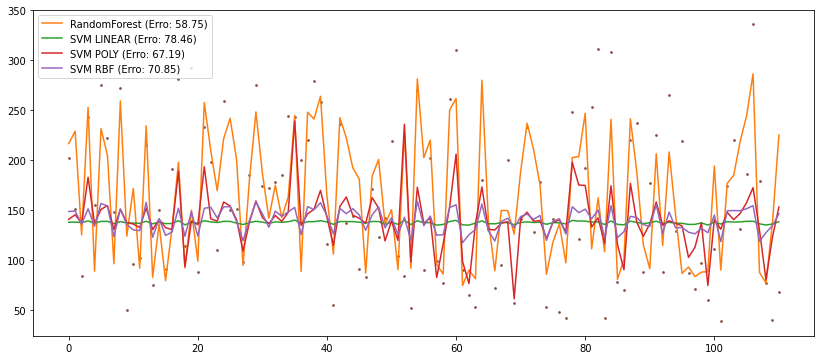

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

test_data = diabetes_test.drop("values", axis=1)


plt.plot(y_pred_random_forest, label="RandomForest (Erro: " + str(round(rmse_random_forest, 2)) + ")", color="C1")
plt.plot(y_pred_svm_lin, label="SVM LINEAR (Erro: " + str(round(rmse_svm_lin, 2)) + ")", color="C2")
plt.plot(y_pred_svm_poly, label="SVM POLY (Erro: " + str(round(rmse_svm_poly, 2)) + ")", color="C3")
plt.plot(y_pred_svm_rbf, label="SVM RBF (Erro: " + str(round(rmse_svm_rbf, 2)) + ")", color="C4")

x = list(range(0, diabetes_test.index.size))
y = test_data[: 0]

X=diabetes_test.drop("values", axis=1)
y_atual=np.array(diabetes_test['values'])

print(len(y_atual))

print(len(X))
plt.scatter(range(0, len(X)), y_atual, s=3, color="C5")

plt.legend()

##### Exercício 3 - Clusterização

Neste exercício, vamos trabalhar com um conjunto de dados gerado sinteticamente (abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Fazer o gráfico de K distance para descobrir um valor de epsilon adequado a ser utilizado no DBSCAN. Qual valor você escolheu?
<br>2- Executar o DBSCAN com valores padrão para os parâmetros. 
<br>3- Apresentar gráfico em duas dimensões que mostre os pontos no espaço de busca. Cada ponto deve ser colorido de acordo com o cluster ao qual ele foi associado. A cor também pode indicar que ele é um outlier. 
<br>4- Executar o DBSCAN com o valor de epsilon escolhido no passo 1.
<br>5- Apresentar gráfico em duas dimensões que mostre os pontos no espaço de busca. Cada ponto deve ser colorido de acordo com o cluster ao qual ele foi associado. A cor também pode indicar que ele é um outlier. 

<br>Qual é a diferença entre os resultados obtidos com o epsilon padrão e o epsilon escolhido por você? Pensando no funcionamento do algoritmo, porque temos esta diferença?

In [167]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)

# Generate data
X, Y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

pd.DataFrame(X)

,0,1
0,7.299236,7.061011
1,3.108777,3.025862
2,7.214012,6.668760
3,2.626356,3.160262
4,3.248319,2.907813
...,...,...
995,2.939292,3.187503
996,7.634324,7.153149
997,1.912482,2.010603
998,2.393725,2.454585


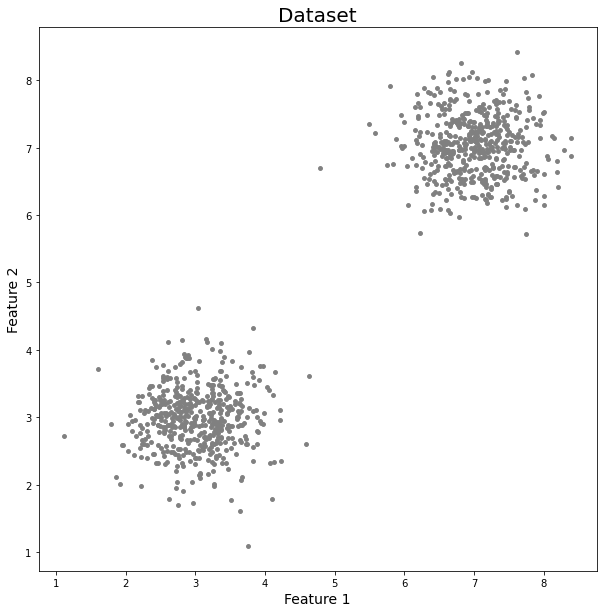

In [168]:
#Apresentando estes dados em um gráfico
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### Gráfico de K distance

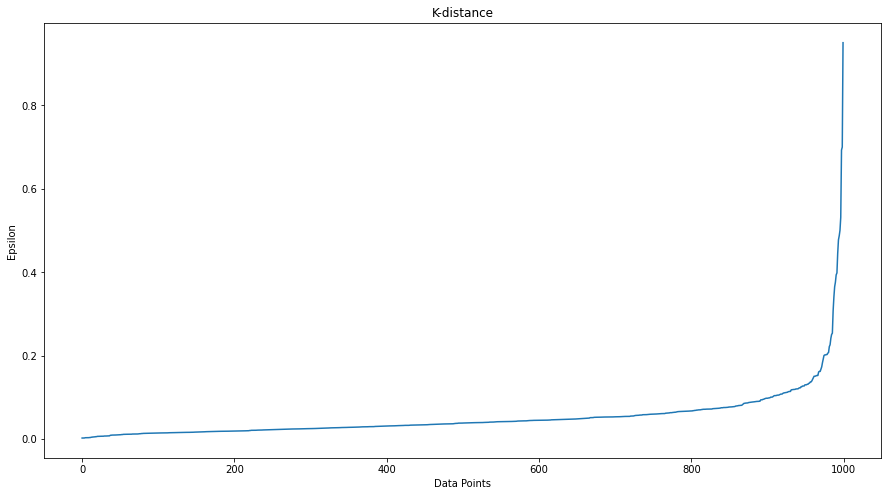

In [179]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.title('K-distance')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

UM bom valor de epsilon é entre 0.15 e 0.2

### DBSCAN com valores padrão

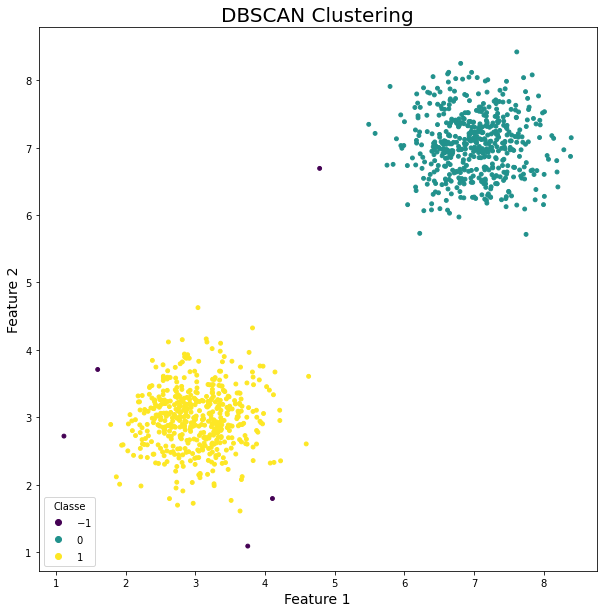

In [183]:
dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(X)


plt.figure(figsize=(10,10))
scatter=plt.scatter(X[:,0],X[:,1],c=y_dbscan,s=15)
plt.legend(*scatter.legend_elements(),loc="lower left", title="Classe")
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

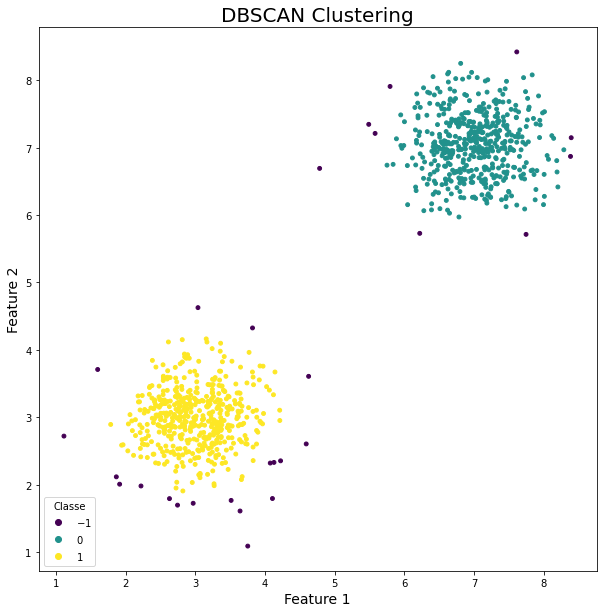

In [194]:
dbscan = DBSCAN(eps = 0.3, min_samples = 10)
y_dbscan = dbscan.fit_predict(X)


plt.figure(figsize=(10,10))
scatter=plt.scatter(X[:,0],X[:,1],c=y_dbscan,s=15)
plt.legend(*scatter.legend_elements(),loc="lower left", title="Classe")
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Qual é a diferença entre os resultados obtidos com o epsilon padrão e o epsilon escolhido por você? Pensando no funcionamento do algoritmo, porque temos esta diferença?

O algoritmo DBSCAN define os clusters como regiões de alta densidade, e para isso utiliza dois parâmetros, epsilon e min_samples. O parametros epsilon define a distância máxima que dois pontos podem ter para serem considerados na mesma "vizinhança" e o parametros min_samples define o mínimo de instâncias que uma vizinhança deve ter para ser considerado um instância core. 



Aumentando o valor de epsilon o modelo tende a formar menos clusters e aumentando o valor de min_samples o modelo tende a detectar mais outliers


Os valores que parecem fazer mais sentido são:

eps: 0.3
min_samples: 10